<a href="https://colab.research.google.com/github/lakshmipriyaMulinti/Object-classification/blob/main/RECOGNITION_OF_objects_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING THE REQUIRED 

In [ ]:
import tensorflow as tf
from keras.utils import np_utils
from matplotlib import pyplot as plt
import numpy as np

LOADING AND SPLITTING THE DATA 

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
print('Training Images: {}'.format(X_train.shape))
print('Testing Images: {}'.format(X_test.shape))

Training Images: (50000, 32, 32, 3)
Testing Images: (10000, 32, 32, 3)


In [ ]:
print(X_train.ndim)

4


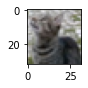

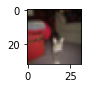

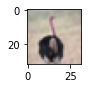

In [ ]:
for i in range(333,336):
    #plt.subplot(120+ 1 + i) 
    plt.figure(figsize=(1,1))
    img = X_train[i]
    plt.imshow(img)
    plt.show()

PREPROCESSING THE DATA 

In [ ]:
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test=X_test/255

n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape0)

Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)


Shape before one-hot encoding:  (50000, 1)
Shape after one-hot encoding:  (50000, 10)


BUILDING THE MODEL 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten

model = Sequential()
#convolutional layers
model.add(Conv2D(50, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(32, 32, 3)))
        
model.add(Conv2D(75, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(125, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

# hidden layer
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(10, activation='softmax'))

# compiling 
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# training the model 
model.fit(X_train, Y_train, batch_size=128, epochs=20)

Epoch 1/20
391/391 [==============================] - 510s 1s/step - loss: 1.8541 - accuracy: 0.3054
Epoch 2/20
391/391 [==============================] - 507s 1s/step - loss: 1.1563 - accuracy: 0.5869
Epoch 3/20
391/391 [==============================] - 500s 1s/step - loss: 0.9290 - accuracy: 0.6742
Epoch 4/20
391/391 [==============================] - 493s 1s/step - loss: 0.8097 - accuracy: 0.7182
Epoch 5/20
391/391 [==============================] - 498s 1s/step - loss: 0.7213 - accuracy: 0.7488
Epoch 6/20
391/391 [==============================] - 491s 1s/step - loss: 0.6495 - accuracy: 0.7709
Epoch 7/20
391/391 [==============================] - 489s 1s/step - loss: 0.6097 - accuracy: 0.7886
Epoch 8/20
391/391 [==============================] - 486s 1s/step - loss: 0.5533 - accuracy: 0.8071
Epoch 9/20
391/391 [==============================] - 491s 1s/step - loss: 0.5013 - accuracy: 0.8235
Epoch 10/20
391/391 [==============================] - 487s 1s/step - loss: 0.4626 - accura

In [ ]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 26s 84ms/step - loss: 0.7062 - accuracy: 0.7905


[0.706230640411377, 0.7904999852180481]

PREDICTING 

In [ ]:
classes = range(0,10)

names = ['airplane',
        'automobile',
        'bird',
        'cat',
        'deer',
        'dog',
        'frog',
        'horse',
        'ship',
        'truck']

# zip the names and classes to make a dictionary of class_labels
class_labels = dict(zip(classes, names))

# generate batch of 9 images to predict
batch = X_test[100:109]
labels = np.argmax(Y_test[100:109],axis=-1)

# make predictions
predictions = model.predict(batch, verbose = 1)

1/1 [==============================] - 0s 39ms/step


In [ ]:
print (predictions)

[[3.06639013e-05 3.16428583e-07 1.62583273e-02 1.72837905e-03
  6.11948073e-01 3.35878916e-02 1.84123910e-05 3.36424768e-01
  1.49807283e-06 1.73420563e-06]
 [2.13220701e-05 1.49016796e-05 1.10727688e-02 1.57197312e-01
  9.40503832e-03 7.98298061e-01 2.24247333e-02 1.40097446e-03
  2.26840475e-05 1.42140969e-04]
 [9.75978946e-06 1.10239098e-05 2.22564139e-03 7.52031396e-04
  1.24061335e-04 1.48927083e-03 9.95372355e-01 5.36945390e-06
  9.27392193e-06 1.13875910e-06]
 [2.74538678e-07 6.28299830e-08 6.25501252e-06 7.28024721e-01
  4.01380676e-04 1.09292578e-03 2.70471662e-01 1.03933235e-06
  4.79803894e-08 1.64323592e-06]
 [2.08763709e-07 9.99981046e-01 8.56452631e-15 1.05239203e-11
  1.18100097e-16 3.55883137e-15 5.64864908e-12 3.48498323e-14
  3.51841379e-07 1.83204356e-05]
 [1.55434947e-07 9.99788821e-01 2.16734512e-11 4.56331112e-10
  8.20987446e-15 1.69887687e-14 1.20978578e-08 2.12211745e-13
  3.00080933e-06 2.08047029e-04]
 [1.54834019e-03 1.98099815e-06 2.74312794e-01 1.45361856e

In [ ]:
for image in predictions:
    print(np.sum(image))

1.0000001
0.99999994
0.99999994
1.0
0.99999994
1.0
0.99999994
1.0
0.99999994


In [ ]:
class_result = np.argmax(predictions,axis=-1)
print (class_result)

[4 5 6 3 1 1 6 6 8]


FINAL OBJECT DETECTION 

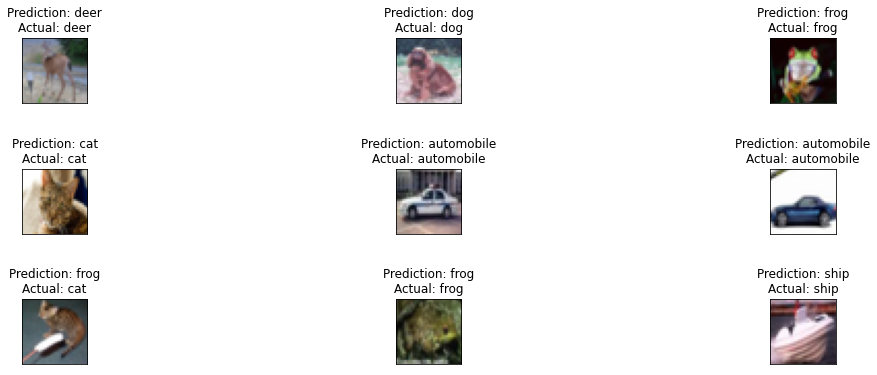

In [ ]:

fig, axs = plt.subplots(3, 3, figsize = (19,6))
fig.subplots_adjust(hspace = 1)
axs = axs.flatten()

for i, img in enumerate(batch):
    for key, value in class_labels.items():
        if class_result[i] == key:
            title = 'Prediction: {}\nActual: {}'.format(class_labels[key], class_labels[labels[i]])
            axs[i].set_title(title)
            axs[i].axes.get_xaxis().set_visible(False)
            axs[i].axes.get_yaxis().set_visible(False)
            
    # plot the image
    axs[i].imshow(img)
    
# show the plot
plt.show()